In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


# 1. 데이터 수집 

1.1 데이터 불러오기

In [6]:
import numpy as np
import pandas as pd

# 데이터 경로
data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv') # 훈련 데이터
test = pd.read_csv(data_path + 'test.csv')   # 테스트 데이터
submission = pd.read_csv(data_path + 'sampleSubmission.csv') # 제출 샘플 데이터

print(train.shape, test.shape)
display(train)

(10886, 12) (6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# 1.2 결측치 확인 / 제거

In [7]:
train.info()
#결측치가 없음을 확인함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# 1.3 파생변수 생

In [9]:
# 날짜피쳐
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성

# 날짜&시간 피쳐
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0]) 
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2]) 
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00


In [10]:
# 요일 피쳐 (교재)

from datetime import datetime
import calendar

train['weekday_book'] = train['date'].apply(
    lambda dateString: 
    calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
train['weekday_book']

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: weekday_book, Length: 10886, dtype: object

In [11]:
# 요일 피쳐 (또 다른 방법)

train['weekday'] = pd.to_datetime(train['date'])

train['weekday_num'] = train['weekday'].dt.weekday
print("숫자로 표현하기")
print(train['weekday_num'])

print("문자로 표현하기")
train['weekday'] = train['weekday'].dt.day_name()
print(train['weekday'])

숫자로 표현하기
0        5
1        5
2        5
3        5
4        5
        ..
10881    2
10882    2
10883    2
10884    2
10885    2
Name: weekday_num, Length: 10886, dtype: int64
문자로 표현하기
0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: weekday, Length: 10886, dtype: object


In [12]:
# 계절 피쳐 (map)

train['season_map'] = train['season'].map({1: 'Spring', 
                                       2: 'Summer', 
                                       3: 'Fall', 
                                       4: 'Winter' })
print(train['season_map'])

# 계절 피쳐 (replace)

train['season_replace'] = train['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
train['season_replace']

print(train['season_replace'])

0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
10881    Winter
10882    Winter
10883    Winter
10884    Winter
10885    Winter
Name: season_map, Length: 10886, dtype: object
0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
10881    Winter
10882    Winter
10883    Winter
10884    Winter
10885    Winter
Name: season_replace, Length: 10886, dtype: object


In [13]:
# 날씨 피쳐
train['weather_obj'] = train['weather'].map({1: 'Clear', 
                                         2: 'Mist, Few clouds', 
                                         3: 'Light Snow, Rain, Thunder', 
                                         4: 'Heavy Snow, Rain, Thunder'})
print(train['weather_obj'])

train.head()

0        Clear
1        Clear
2        Clear
3        Clear
4        Clear
         ...  
10881    Clear
10882    Clear
10883    Clear
10884    Clear
10885    Clear
Name: weather_obj, Length: 10886, dtype: object


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,day,hour,minute,second,weekday_book,weekday,weekday_num,season_map,season_replace,weather_obj
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,01,00,00,00,Saturday,Saturday,5,Spring,Spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,01,01,00,00,Saturday,Saturday,5,Spring,Spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,01,02,00,00,Saturday,Saturday,5,Spring,Spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,01,03,00,00,Saturday,Saturday,5,Spring,Spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,01,04,00,00,Saturday,Saturday,5,Spring,Spring,Clear


# 1.4 데이터 시각화

In [14]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

##### 왜도 분석 #####
1.2420662117180776
##### count 분석 #####


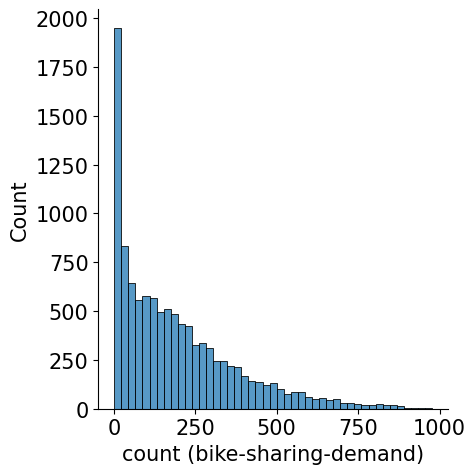

In [15]:
print("##### 왜도 분석 #####")
print(train['count'].skew())

# skewness가 -0.5 ~ 0,5 일 경우 데이터는 상당히 대칭적이다.
# skewness가 -1~-0.5 이거나 0.5~1 일 경우 데이터는 적당히 치우쳐있다.
# skewness가 -1보다 작거나 1보다 클 경우 데이터는 상당히 치우쳐있다.

print("##### count 분석 #####")
mpl.rc('font', size=15)
sns.displot(train['count'])
plt.xlabel("count (bike-sharing-demand)");

##### 최솟값 분석 #####
1
977
##### 왜도 분석 #####
0.2167762926523888
##### count 분석 #####


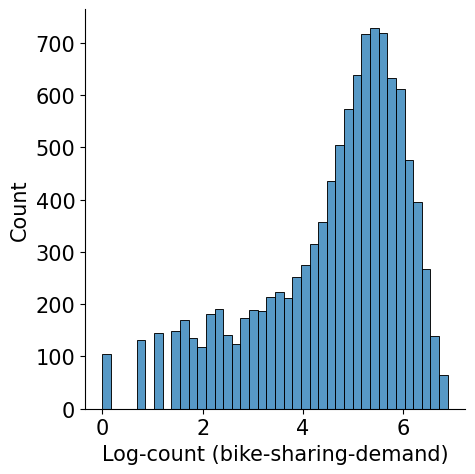

In [16]:
#1. Log Transform / 로그 변환
print("##### 최솟값 분석 #####")
print(train['count'].min())
print(train['count'].max())

print("##### 왜도 분석 #####")
print(np.log(train['count'].skew()))

print("##### count 분석 #####")
mpl.rc('font', size=15)    
sns.displot(np.log(train['count']))
plt.xlabel("Log-count (bike-sharing-demand)");

##### 왜도 분석 #####
1.1144802428567666
##### count 분석 #####


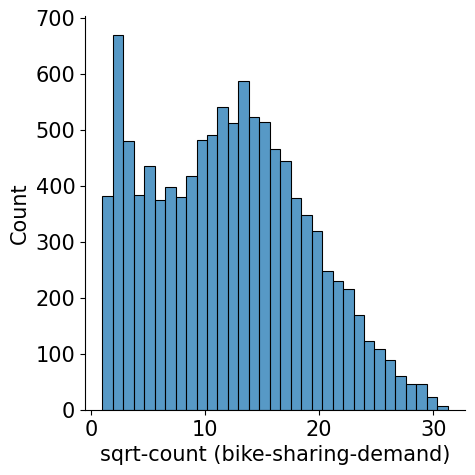

In [17]:
#2. Square Root Transform / 루트(제곱근) 변환
# # 루트 변환
# df_root = np.sqrt(df_train['LotArea'])
# # skewness 확인
# print(df_root.skew())
# # KDE plot 출력
# sns.distplot(df_root)


print("##### 왜도 분석 #####")
print(np.sqrt(train['count'].skew()))

print("##### count 분석 #####")
mpl.rc('font', size=15)    
sns.displot(np.sqrt(train['count']))
plt.xlabel("sqrt-count (bike-sharing-demand)");

##### 왜도 분석 #####
-0.1539524621267384
##### count 분석 #####


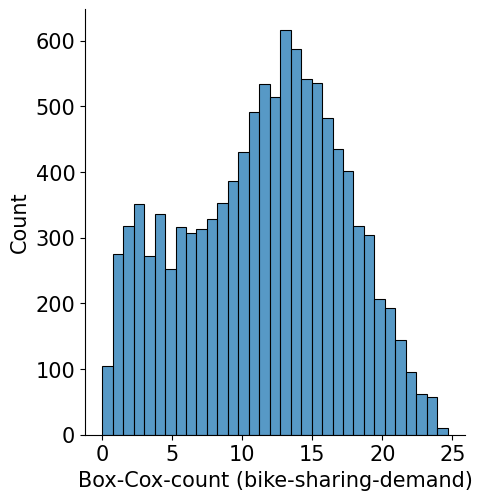

In [18]:
#3. Box-Cox Transform / Box-Cox 변환

from scipy import stats

print("##### 왜도 분석 #####")
print(pd.Series(stats.boxcox(train['count'])[0]).skew())

print("##### count 분석 #####")
mpl.rc('font', size=15)    
# sns.displot(np.sqrt(train['count']))
sns.displot(pd.Series(stats.boxcox(train['count'])[0]))
plt.xlabel("Box-Cox-count (bike-sharing-demand)");

막대그래프

[Text(0.5, 1.0, 'Rental amounts by second')]

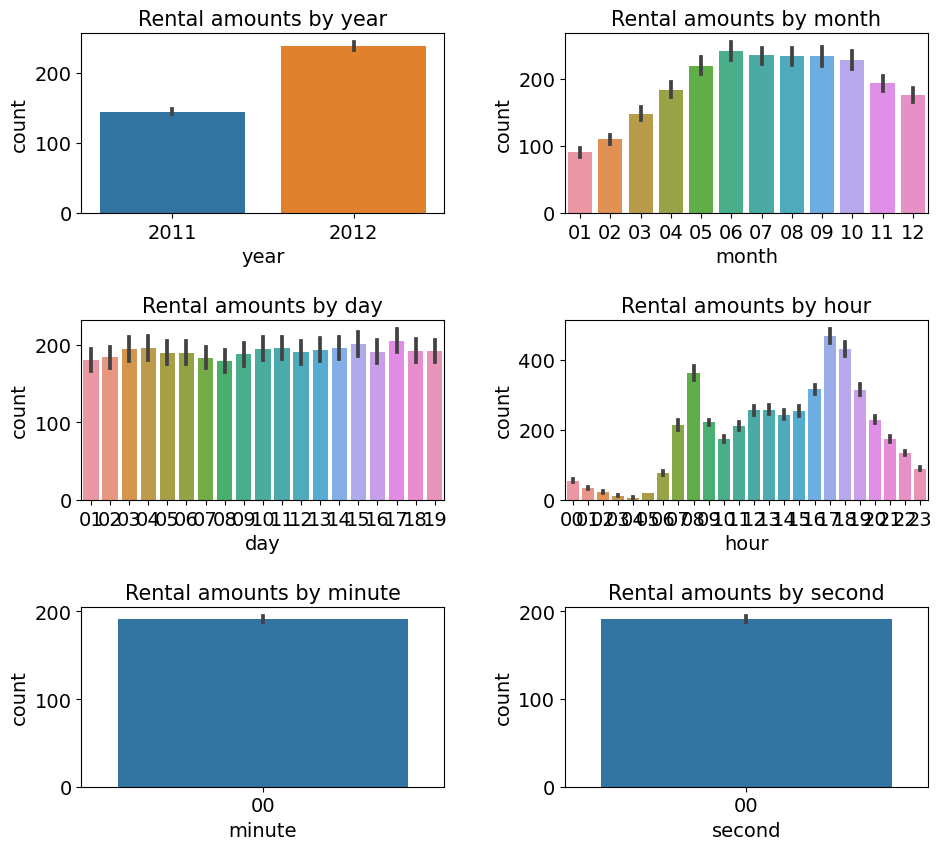

In [19]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=14)       # 폰트 크기 설정
mpl.rc('axes', titlesize=15)  # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성 
plt.tight_layout()            # 그래프 사이에 여백 확보 
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10x9인치로 설정 

# 스텝 2 : 각 축에 서브플롯 할당
# 각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

# 3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
# axes[1, 0].tick_params(axis='x', labelrotation=90)
# axes[1, 1].tick_params(axis='x', labelrotation=90)

박스플롯

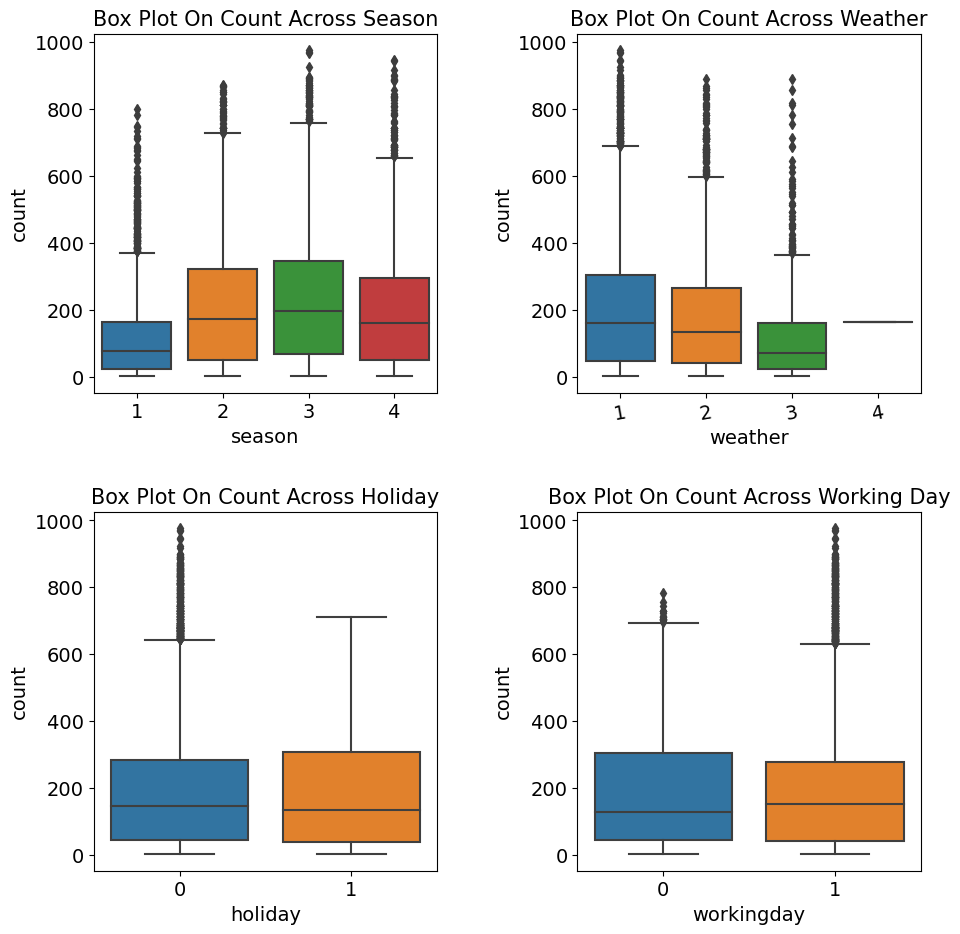

In [20]:
# 스텝 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 스텝 2 : 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3-2 : x축 라벨 겹침 해결
axes[0, 1].tick_params('x', labelrotation=10) # 10도 회전

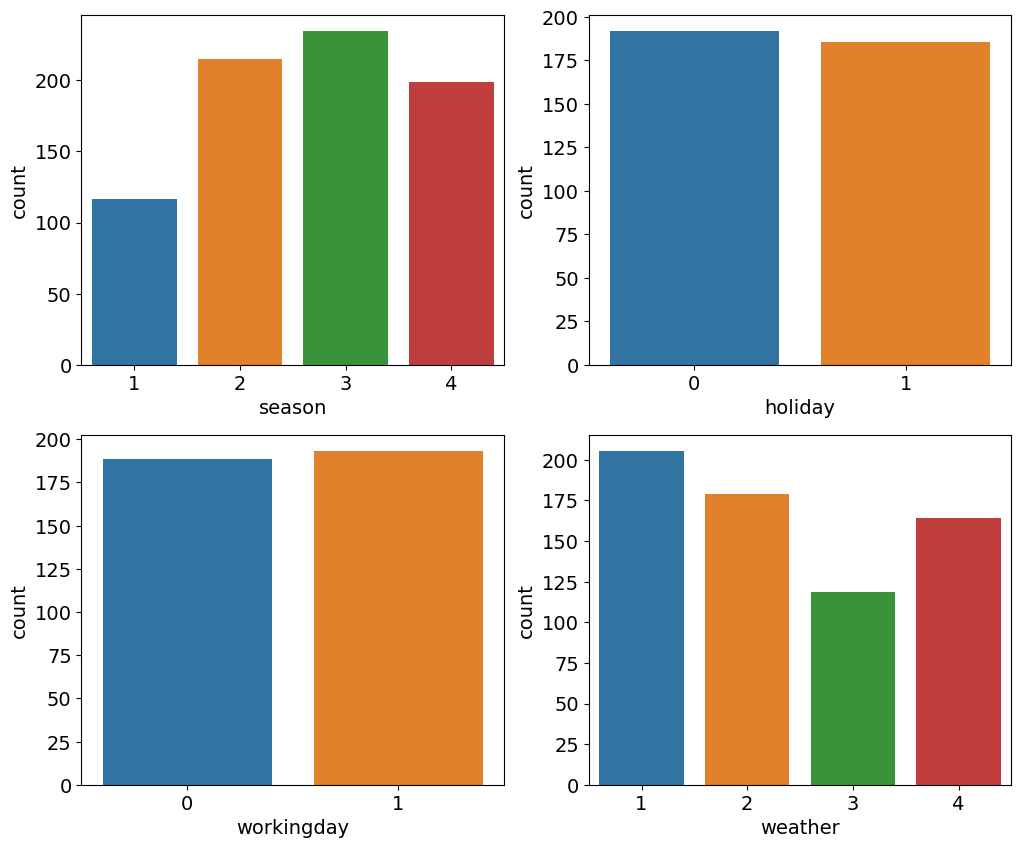

In [21]:
#계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

#휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())

#작업일 여부와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())

#날씨와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())

In [ ]:
# Seasion의 재정의

# def badToRight(month):
#     if month in [12,1,2]:
#         return 4
#     elif month in [3,4,5]:
#         return 1
#     elif month in [6,7,8]:
#         return 2
#     elif month in [9,10,11]:
#         return 3

# #apply() 내장함수는 split(),map(),join(),filter()등 과 함꼐 필수적으로 숙지해야 할 함수이다.
# train['season'] = train.month.apply(badToRight)

In [ ]:
# #계절과 count
# fig = plt.figure(figsize=[12,10])
# ax1 = fig.add_subplot(2,2,1)
# ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

# #휴일 여부와 count
# ax2 = fig.add_subplot(2,2,2)
# ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())

# #작업일 여부와 count
# ax3 = fig.add_subplot(2,2,3)
# ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())

# #날씨와 count
# ax4 = fig.add_subplot(2,2,4)
# ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())

포인트플롯

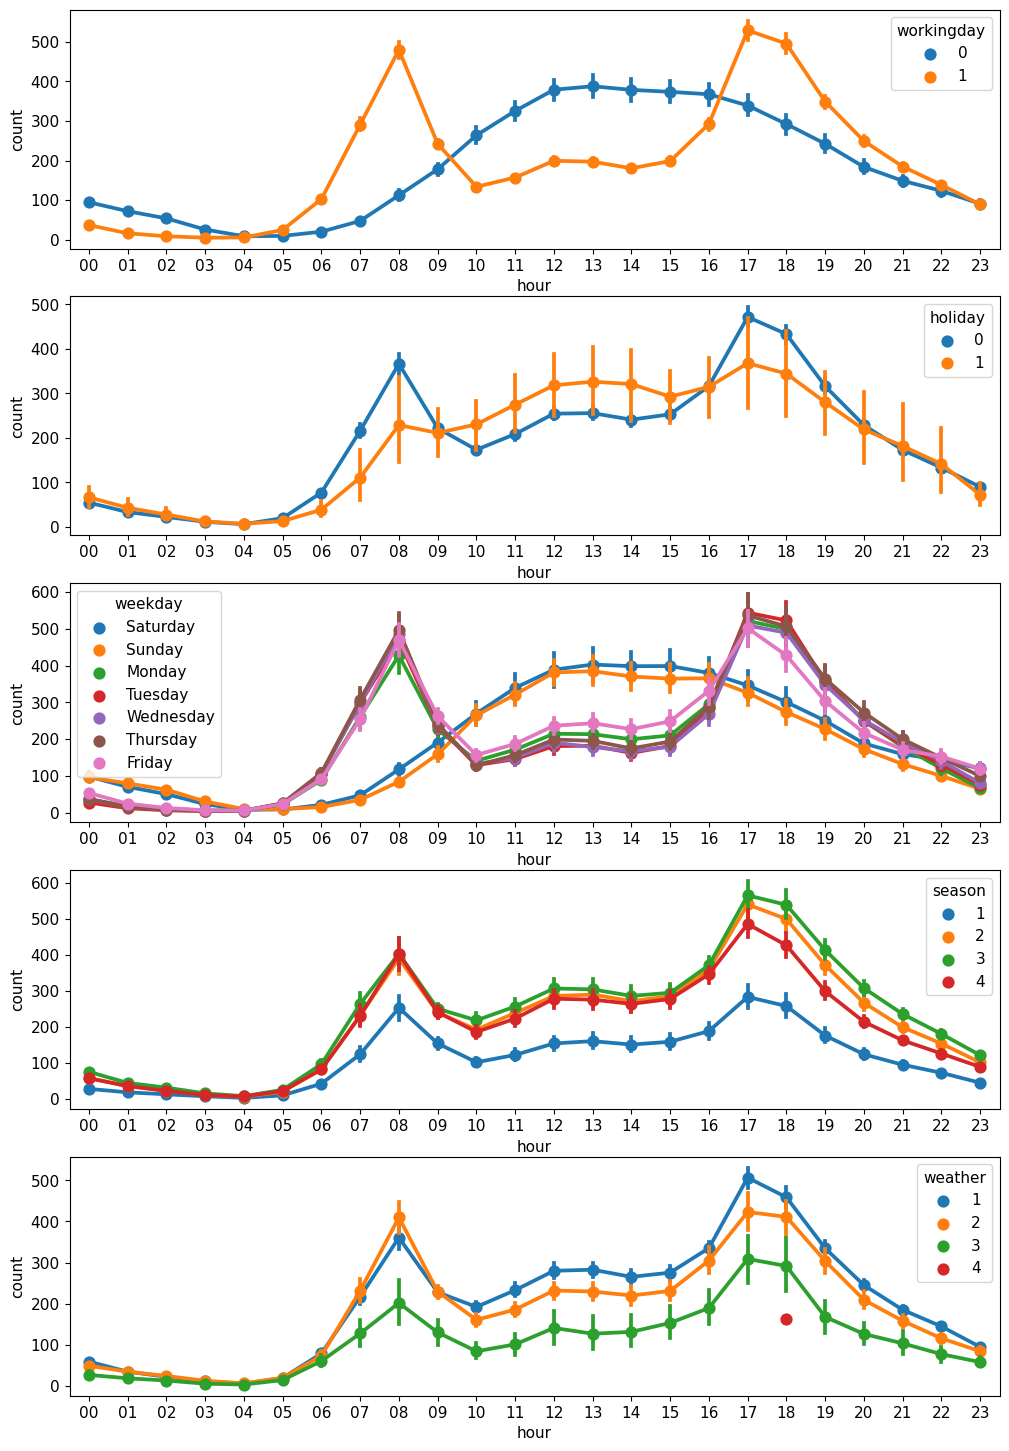

In [24]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12, 18)

# 스텝 2 : 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);

회귀선을 포함한 산점도 그래프

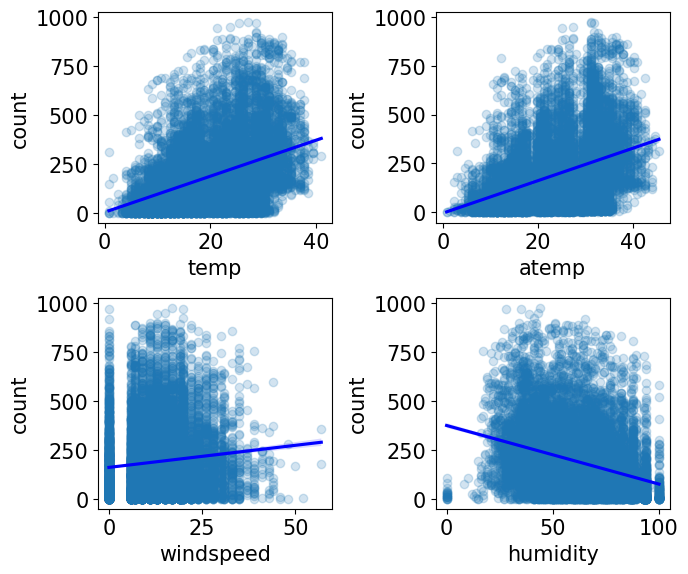

In [22]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

# 스텝 2 : 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12

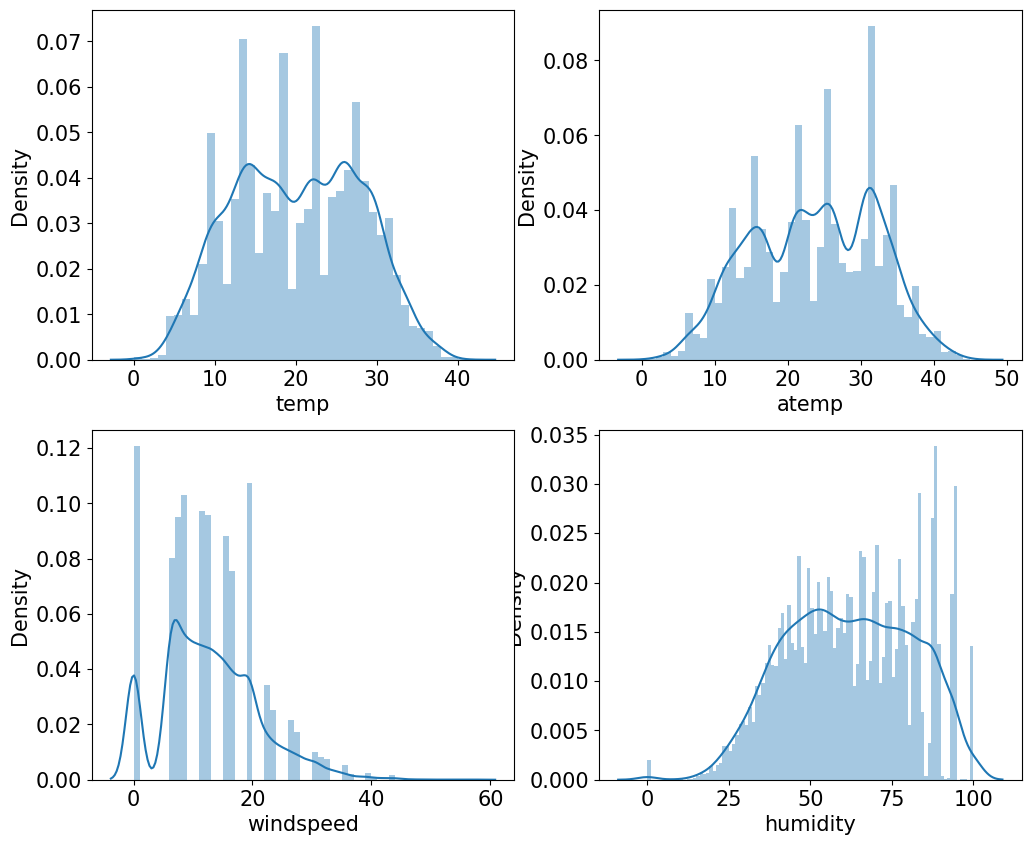

In [23]:
#온도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(train.temp,bins=range(train.temp.min().astype('int'),train.temp.max().astype('int')+1))

#평균온도와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(train.atemp,bins=range(train.atemp.min().astype('int'),train.atemp.max().astype('int')+1))

#습도와 count
ax3 = fig.add_subplot(2,2,4)
ax3 = sns.distplot(train.humidity,bins=range(train.humidity.min().astype('int'),train.humidity.max().astype('int')+1))

#바람속도와 count
ax4 = fig.add_subplot(2,2,3)
ax4 = sns.distplot(train.windspeed,bins=range(train.windspeed.min().astype('int'),train.windspeed.max().astype('int')+1))

히트맵

피처 간 상관관계 매트릭스를 통해서 상관계수가 낮은 windspeed 제거 고려 가능함

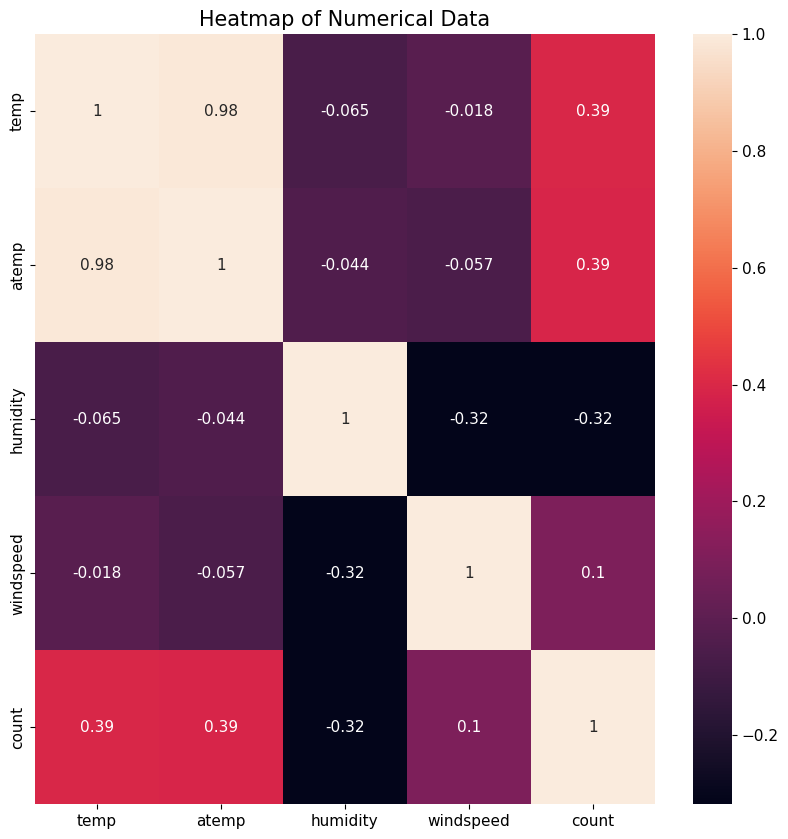

In [26]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() 
fig, ax= plt.subplots() 
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True)
ax.set(title='Heatmap of Numerical Data');

# 2. 피처 엔지니어링
피처 엔지니어링은 데이터를 변환하는 작업

피처 엔지니어링은 훈련, 테스트 데이터에 모두 적용해야 함

따라서 피처 엔지니어링 전에 두 데이터를 합쳤다가 다 끝나면 도로 나눠줘야 함

# 2.1 이상치 제거
훈련 데이터에서 weather가 4가 아닌 데이터만 추출

In [27]:
train = train[train['weather'] != 4]

# 2.2 데이터 합치기 (train, test)

In [28]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,day,hour,minute,second,weekday_book,weekday,weekday_num,season_map,season_replace,weather_obj
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,...,01,00,00,00,Saturday,Saturday,5.0,Spring,Spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,...,01,01,00,00,Saturday,Saturday,5.0,Spring,Spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,...,01,02,00,00,Saturday,Saturday,5.0,Spring,Spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,...,01,03,00,00,Saturday,Saturday,5.0,Spring,Spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,...,01,04,00,00,Saturday,Saturday,5.0,Spring,Spring,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2.3 파생 변수(피처) 추가

In [29]:
all_data['datetime'] = pd.to_datetime(all_data['datetime']) # datetime 타입으로 바꾸기

all_data['year'] = all_data['datetime'].dt.year         # 연도
all_data['month'] = all_data['datetime'].dt.month       # 월
all_data['hour'] = all_data['datetime'].dt.hour         # 시간
all_data['weekday'] = all_data['datetime'].dt.weekday   # 요일

# 2.4 피처 선정 (사용안하는 피처 제거)

In [30]:
# Drop 방식
# drop_features = ['casual', 'registered', 'datetime', 'month', 'windspeed']
# all_data = all_data.drop(drop_features, axis=1)

# 직접 선 방식
all_data02 = all_data[['month', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'year', 'hour', 'weekday', 'count']]
all_data02

,month,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday,count
0,1,0,0,1,9.84,14.395,81,2011,0,5,16.0
1,1,0,0,1,9.02,13.635,80,2011,1,5,40.0
2,1,0,0,1,9.02,13.635,80,2011,2,5,32.0
3,1,0,0,1,9.84,14.395,75,2011,3,5,13.0
4,1,0,0,1,9.84,14.395,75,2011,4,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...
17373,12,0,1,2,10.66,12.880,60,2012,19,0,NaN
17374,12,0,1,2,10.66,12.880,60,2012,20,0,NaN
17375,12,0,1,1,10.66,12.880,60,2012,21,0,NaN
17376,12,0,1,1,10.66,13.635,56,2012,22,0,NaN


# 2.5 데이터 나누기

In [32]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data02[~pd.isnull(all_data02['count'])]
X_test = all_data02[pd.isnull(all_data02['count'])]

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count']

print(X_train.info())
print(len(y))

display(X_train.head())
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10885 entries, 0 to 10884
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       10885 non-null  int64  
 1   holiday     10885 non-null  int64  
 2   workingday  10885 non-null  int64  
 3   weather     10885 non-null  int64  
 4   temp        10885 non-null  float64
 5   atemp       10885 non-null  float64
 6   humidity    10885 non-null  int64  
 7   year        10885 non-null  int64  
 8   hour        10885 non-null  int64  
 9   weekday     10885 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 935.4 KB
None
10885


,month,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,0,5
1,1,0,0,1,9.02,13.635,80,2011,1,5
2,1,0,0,1,9.02,13.635,80,2011,2,5
3,1,0,0,1,9.84,14.395,75,2011,3,5
4,1,0,0,1,9.84,14.395,75,2011,4,5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10885 entries, 0 to 10884
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       10885 non-null  int64  
 1   holiday     10885 non-null  int64  
 2   workingday  10885 non-null  int64  
 3   weather     10885 non-null  int64  
 4   temp        10885 non-null  float64
 5   atemp       10885 non-null  float64
 6   humidity    10885 non-null  int64  
 7   year        10885 non-null  int64  
 8   hour        10885 non-null  int64  
 9   weekday     10885 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 935.4 KB
None


# 3. 모델 생성

# 3.1 평가지표

In [34]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output


# from sklearn.metrics import mean_squared_log_error
# msle = mean_squared_log_error(df['PY'], df['Y'])
# rmsle = msle**0.5

# 3.2 LinearRegression

In [35]:
from sklearn.linear_model import LinearRegression

# 모델 생성
linear_reg_model = LinearRegression()
log_y = np.log(y)  
linear_reg_model.fit(X_train, log_y)

# 모델 성능 검증
preds = linear_reg_model.predict(X_train)
print (f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

linearreg_preds = linear_reg_model.predict(X_test)

submission['count'] = np.exp(linearreg_preds)
# submission.to_csv('submission.csv', index=False) 
submission

선형회귀의 RMSLE 값 : 1.0187


,datetime,count
0,2011-01-20 00:00:00,10.668459
1,2011-01-20 01:00:00,12.760936
2,2011-01-20 02:00:00,14.149500
3,2011-01-20 03:00:00,15.298530
4,2011-01-20 04:00:00,16.963219
...,...,...
6488,2012-12-31 19:00:00,211.925556
6489,2012-12-31 20:00:00,234.985944
6490,2012-12-31 21:00:00,259.589574
6491,2012-12-31 22:00:00,314.031090


/교재 내용/

선형회귀 인자 1 'seacon' : 1.0205

인자 2 'month': 0.1091

릿지 : 1.0205

라쏘 : 1.205

RF : 0.1126

# 3.3 랜덤 포레스트 

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# param_grid_RF = {'n_estimators':[10, 100, 1000], 'max_features':[None, 'auto', 'sqrt', 'log2'], 'max_depth' : [5, 10], 'n_jobs':[-1]}

param_grid_RF = {'n_estimators':[10, 150, 300], 'max_features':[None, 'auto', 'sqrt', 'log2'], 'n_jobs':[-1]}
grid_search_RF = GridSearchCV(estimator=RandomForestRegressor(), 
                 param_grid = param_grid_RF,
                 scoring = 'neg_mean_squared_log_error',
                 cv=5)
grid_search_RF.fit(X_train, log_y)

print(f'Best grid search = {grid_search_RF.best_params_}')
print(f'Best grid search score = {grid_search_RF.best_score_}')

RF_result = pd.DataFrame(grid_search_RF.cv_results_)
RF_result = RF_result.sort_values(by='mean_test_score', ascending=False)
print(RF_result[['params', 'mean_test_score']])  

Best grid search = {'max_features': 'auto', 'n_estimators': 300, 'n_jobs': -1}
Best grid search score = -0.0197923696837606
                                               params  mean_test_score
5   {'max_features': 'auto', 'n_estimators': 300, ...        -0.019792
4   {'max_features': 'auto', 'n_estimators': 150, ...        -0.019821
2   {'max_features': None, 'n_estimators': 300, 'n...        -0.019930
1   {'max_features': None, 'n_estimators': 150, 'n...        -0.019933
3   {'max_features': 'auto', 'n_estimators': 10, '...        -0.021851
0   {'max_features': None, 'n_estimators': 10, 'n_...        -0.022062
7   {'max_features': 'sqrt', 'n_estimators': 150, ...        -0.024568
8   {'max_features': 'sqrt', 'n_estimators': 300, ...        -0.024629
10  {'max_features': 'log2', 'n_estimators': 150, ...        -0.024790
11  {'max_features': 'log2', 'n_estimators': 300, ...        -0.025082
9   {'max_features': 'log2', 'n_estimators': 10, '...        -0.026396
6   {'max_features': 'sq

In [37]:
from sklearn.metrics import mean_squared_log_error
preds = grid_search_RF.best_estimator_.predict(X_train)
print(f'grid_search_RF RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

grid_search_RF RMSLE 값 : 0.1078


# 3.4 다양한 기계학습 모델 & 앙상블 모델

In [38]:
from lightgbm import LGBMRegressor
def LGBM_model():
    LGBM = LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=1000, max_depth=10,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)
    LGBM.fit(X_train, log_y)
    pre_test = LGBM.predict(X_train)
    score = rmsle(log_y,pre_test)
    return score, LGBM

from sklearn.ensemble import RandomForestRegressor
def RandomForest_model():
#     RFR = RandomForestRegressor(n_estimators = 140, max_depth=15, random_state=0,n_jobs = -1)

    RFR = RandomForestRegressor(n_estimators = 140, random_state=42, n_jobs = -1)
    RFR.fit(X_train, log_y)
    pre_test = RFR.predict(X_train)
    score = rmsle(log_y,pre_test)
    return score, RFR


from sklearn.tree import DecisionTreeRegressor
def DecisionTree_model():
    DTR = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=10)
    DTR.fit(X_train, log_y)
    pre_test = DTR.predict(X_train)
    score = rmsle(log_y,pre_test)
    return score, DTR


from sklearn.ensemble import GradientBoostingRegressor
def GradientBoosting_model():
    GBR = GradientBoostingRegressor(n_estimators = 1000, max_depth = 5, random_state = 0)
    GBR.fit(X_train, log_y)
    pre_test = GBR.predict(X_train)
    score = rmsle(log_y,pre_test)
    return score, GBR


from sklearn.ensemble import AdaBoostRegressor
def AdaBoost_model():
    ABR = AdaBoostRegressor(learning_rate=0.1, loss='square', n_estimators=1000)
    ABR.fit(X_train, log_y)
    pre_test = ABR.predict(X_train)
    score = rmsle(log_y,pre_test)
    return score, ABR



In [39]:
print("LGBM_model:             ",LGBM_model()[0])
print("RandomForest_model:     ",RandomForest_model()[0])
print("DecisionTree_model:     ",DecisionTree_model()[0])
print("GradientBoosting_model: ",GradientBoosting_model()[0])
print("AdaBoost_model:         ",AdaBoost_model()[0])

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
LGBM_model:              0.07161621780909429
RandomForest_model:      0.10856263447477746
DecisionTree_model:      0.9168488699233065
GradientBoosting_model:  0.1587978399640603
AdaBoost_model:          0.7254713608052256


In [40]:
LGBM = LGBM_model()[1]
RFR = RandomForest_model()[1]
GBR = GradientBoosting_model()[1]

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [41]:
from sklearn.ensemble import VotingRegressor
def single_model():
    single_models = [
    ('LGBM', LGBM),
    ('RFR', RFR),
    ('GBR', GBR),
    ]

    # voting regressor 만들기
    voting_regressor = VotingRegressor(single_models, n_jobs=-1)
    voting_regressor.fit(X_train, log_y)
    pre_test = voting_regressor.predict(X_train)
    score = rmsle(log_y,pre_test)
    return score
print("single_model:             ",single_model())

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
single_model:              0.10151738506891952
